In [1]:
import numpy as np
import matplotlib.pyplot as plt
#for generating random numbers
from numpy.random import seed, randint
from functions import generate_single_exp, stretch_exp_fit, double_exp_fit, single_exp_fit, calculate_surface_lifetime, calculate_srv
import math
import pandas as pd
from scipy.stats import skewnorm

In C:\Users\sarth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\sarth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\sarth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### Generate skewed normal random array of lifetime values

In [3]:
seed(10)
# tau_vals = randint(1,1000,100)*1e-9 # convert to s
# create a skewed noraml distribution
tau_vals = skewnorm.rvs(a = 10, loc = 50, scale=100, size=100) *1e-9

In [4]:
np.average(tau_vals)

1.245844614013999e-07

Text(0.5, 0, 'Tau values (ns)')

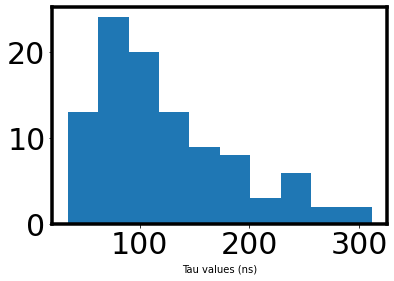

In [5]:
plt.figure()
plt.hist(tau_vals*1e9)
plt.xlabel("Tau values (ns)")

### Generate time array

In [6]:
t = np.linspace(0,5000,num=1000)*1e-9 # converted to s

### Generate single exponentials and average them to see the stretched behavior

In [7]:
I_vals = []

for i in range(len(tau_vals)):
    I_vals.append(generate_single_exp(t,tau_vals[i]))
    
I_vals = np.asarray(I_vals)
#Average Trace
I_avg = np.average(I_vals,axis=0)

(1e-08, 1.5)

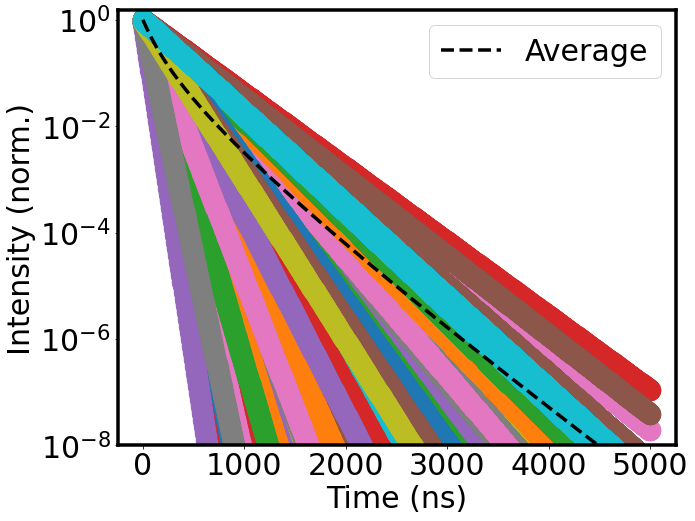

In [8]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals)):
    plt.plot(t*1e9,I_vals[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()
plt.ylim(1e-8,1.5)

### Fit average decay with stretched exponential, double exponential and single exponential 

In [9]:
stretched_exp = stretch_exp_fit(I_avg/np.max(I_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 96.2085015671388
Beta = 0.7610303154538685
avg. tau (ns) = 113.20107937764375


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [10]:
double_exp = double_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 90.29069895254375
a1 = 0.7146659511983788
tau2 (ns) = 227.95663406856585
a2 = 0.26378413824670804
avg. tau (ns) = 127.40459004646975


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [11]:
single_exp = single_exp_fit(I_avg/np.max(I_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 167.08441785267945
a = 0.7652848934366869
avg. tau (ns) = 167.08441785267945


C:\Users\sarth\Documents\TimeResolvedPL\functions.py:132: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
C:\Users\sarth\Documents\TimeResolvedPL\functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))


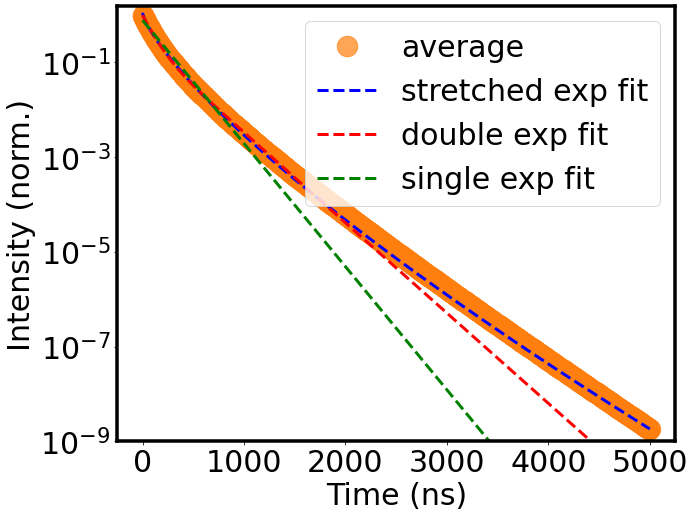

In [12]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg/np.max(I_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.ylim(1e-9,1.5)
plt.legend()

### Calculate the SRV for each lifetime of the 20 data series

From *Jian, Sarthak, ACS Energy Lett. 2019, 4, 222−227* I took the equation to calculate the SRV.

The average tau I calculated above is the same as the tau effective of the paper. This means that is equal to the sum of the reciprocal of the lifetime in the bulk and in the surface:

$\frac{1}{\tau_{eff}}$ = $\frac{1}{\tau_{b}}$ + $\frac{1}{\tau_{s}}$

The $\tau_{s}$ comes to play in the surface recombination velocity calculation along with *W* (thickness) and *D* (diffusion constant) 

*D* can be measured by the Einstein relationship: 

$D = \mu\cdot K_{b}\cdot T$

Where *$\mu$* is the measured carrier mboility values. 

There are two equations used to calculate SRV which describe two different device cases:

**1) $SRV_{1}$ is approximated to zero**

when the SRV on one contact is much greater than the other one on the other contact

$\tau_{s}$ = $\frac{W}{SRV_{2}}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

**1) $SRV_{1}$ = $SRV_{2}$ is approximated to zero**

SRV at the top and the bottom interfaces are the same

$\tau_{s}$ = $\frac{W}{2SRV}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

I considered the values of the previous studied films of *$Cs_{17}Br_{15}$* :

- $\mu$ = 35 $cm^2 V^{-1} s^{-1}$
- $D$ = 0.9 $cm^2 s^{-1}$
- $W$ = 400 $nm$ = 0.00004 $cm$

Approaches to calculate $\tau_{b}$ : 

1) One approach to determine $\tau_{b}$  is to measure and extrapolate $\tau_{b}$ from a very thick sample series  where bulk recombination dominates over surface recombination. 

2) The second approach is the Lewis base passivation using TOPO on MAPI which only bound the surface. For this reason, all the remaining recomination that decrease the PLQE is due to the bulk. 
This method allows us to establish a lower limit for the corresponding bulk lifetime ($\tau_{b}$  > 8 μ s) because surface passivation alone can restore well-prepared samples to such levels of performance. 

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

In [13]:
tau_eff = tau_vals

In [14]:
tau_surf = calculate_surface_lifetime(tau_eff, bulk_lifetime=8000)

In [15]:
# coverting tau_surf to 'cm' units
SRV1_zero, SRV1_SRV2_equal = calculate_srv(tau_surf*1e9, diffusion_coefficient=0.9, thickness=400) #diffusion coeff in cm2/s, thickness in nm

- Calculating the average of the SRV calculated in equation one and two

In [53]:
sim_SRV1_0_ = np.average(SRV1_zero,axis=0)
print(sim_SRV1_0_)

412.2916012224352


In [54]:
sim_SRV1_SRV2_eq_ = np.average(SRV1_SRV2_equal,axis=0)
print(sim_SRV1_SRV2_eq_)

204.73157725958737


- Calculating SRV from the average of the tau_eff array

In [ ]:
tau_math_avg = np.average(tau_surf, axis=0)
tau_math_avg

In [ ]:
SRV_eq1(5.435323093430857e-07)

In [ ]:
SRV_eq2(5.435323093430857e-07)

#### SRV from average tau of streched exponential fitting:


In [27]:
SRV1_0_str, SRV1_SRV2_eq_str = calculate_srv(stretched_exp[3]*1e9)

In [28]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_str))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_str))

SRV1 = 0
SRV = 355.61696449549635
SRV1 = SRV2
SRV = 176.95833824962867


#### SRV from average tau of double exponential fitting:

In [29]:
SRV1_0_db, SRV1_SRV2_eq_db = calculate_srv(double_exp[4]*1e9)

In [30]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_db))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_db))

SRV1 = 0
SRV = 315.7460573092316
SRV1 = SRV2
SRV = 157.2024707366929


#### SRV from only tau2 of double exponential fitting

In [33]:
SRV1_0_db_t2, SRV1_SRV2_eq_db_t2 = calculate_srv(double_exp[2]*1e9)

In [34]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_db_t2))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_db_t2))

SRV1 = 0
SRV = 176.0283471394963
SRV1 = SRV2
SRV = 87.80536771666607


#### SRV from average tau of single exponential fitting:


In [35]:
SRV1_0_si, SRV1_SRV2_eq_si = calculate_srv(single_exp[2]*1e9)

In [36]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_si))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_si))

SRV1 = 0
SRV = 240.4367606013973
SRV1 = SRV2
SRV = 119.82915384466715


### Compare each SRV calculated from different fits to true simulated average

Text(0.5, 0, 'SRV (cm/s)')

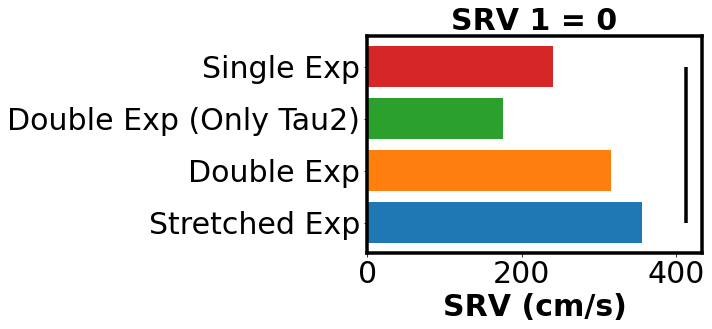

In [62]:
plt.figure()
plt.title("SRV 1 = 0", fontsize=30, fontweight="bold")
plt.barh("Stretched Exp", SRV1_0_str)
plt.barh("Double Exp", SRV1_0_db)
plt.barh("Double Exp (Only Tau2)", SRV1_0_db_t2)
plt.barh("Single Exp", SRV1_0_si)
plt.vlines(sim_SRV1_0_, "Stretched Exp", "Single Exp")

plt.xlabel("SRV (cm/s)", fontsize=30, fontweight="bold")

Text(0.5, 0, 'SRV (cm/s)')

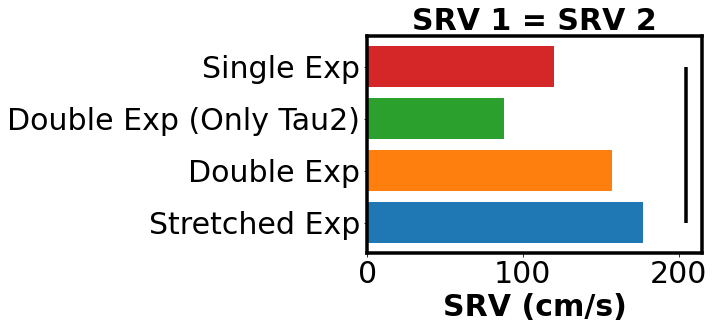

In [60]:
plt.figure()
plt.title("SRV 1 = SRV 2", fontsize=30, fontweight="bold")
plt.barh("Stretched Exp", SRV1_SRV2_eq_str)
plt.barh("Double Exp", SRV1_SRV2_eq_db)
plt.barh("Double Exp (Only Tau2)", SRV1_SRV2_eq_db_t2)
plt.barh("Single Exp", SRV1_SRV2_eq_si)
plt.vlines(sim_SRV1_SRV2_eq_, "Stretched Exp", "Single Exp")

plt.xlabel("SRV (cm/s)", fontsize=30, fontweight="bold")

### Conclusion:

From the SRV results we can see that the most accurate approximation is given by the streched exponential fitting

## Gaussian Distribution of lifetimes

#### Generate a Gaussian distribution with mean = 40 or 200 and a standard deviation of 10 or 50 ns

$
  P(x) = \frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
$

In [ ]:
def normal_p(x, mu, sigma):
    
    part1 = 1 / math.sqrt(2*math.pi*math.pow(sigma,2))
    part2 = math.exp(-1*math.pow((x-mu),2)/2/math.pow(sigma,2))
    probability = part1 * part2
    return probability

In [ ]:
y = [normal_p(x, 40, 10) for x in np.arange(0, 80)]

In [ ]:
plt.plot(np.arange(0, 80), y, c='g')
plt.xticks(np.arange(0, 81, 20))
plt.axvline(x=40, linewidth = 2)
plt.axvline(x=50, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=30, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=60, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=20, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=70, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=10, linewidth = 0.5, color='k', ls='--')

In [ ]:
y2 = [normal_p(x, 200, 50) for x in np.arange(0, 400)]

In [ ]:
plt.plot(np.arange(0, 400), y2, c='r')
plt.xticks(np.arange(0, 401, 100))
plt.axvline(x=200, linewidth = 2)
plt.axvline(x=250, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=150, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=300, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=100, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=350, linewidth = 0.5, color='k', ls='--')
plt.axvline(x=50, linewidth = 0.5, color='k', ls='--')

### 1) Gaussian distribution: mean = 40 ns , standard deviation = 10 ns , size = 1000

In [ ]:
d1 = np.random.normal(loc=40, scale=10, size=1000)

In [ ]:
gaussd1 = pd.DataFrame(data=d1, columns=['lifetime'])

In [ ]:
gaussd1

In [ ]:
gaussd1.hist(bins=20)

In [ ]:
d1_s = d1*1e-9

In [ ]:
np.average(d1_s)

In [ ]:
t_gauss= np.linspace(0, 1000, num= 1000)*1e-9

In [ ]:
I_gauss = []

for i in range(len(d1_s)):
    I_gauss.append(generate_single_exp(t_gauss,d1_s[i]))
    
I_gauss = np.asarray(I_gauss)
I_avg_gauss = np.average(I_gauss,axis=0)

In [ ]:
plt.figure(figsize=(10,8))
for i in range(len(d1_s)):
    plt.plot(t_gauss*1e9,I_gauss[i],'o')
plt.plot(t_gauss*1e9,I_avg_gauss,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [ ]:
gauss_stretched_exp = stretch_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau_c (ns) = "+str(gauss_stretched_exp[0]*1e9))
print("Beta = "+str(gauss_stretched_exp[1]))
print("avg. tau (ns) = "+str(gauss_stretched_exp[3]*1e9))

In [ ]:
gauss_double_exp = double_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau1 (ns) = "+str(gauss_double_exp[0]*1e9))
print("a1 = "+str(gauss_double_exp[1]))
print("tau2 (ns) = "+str(gauss_double_exp[2]*1e9))
print("a2 = "+str(gauss_double_exp[3]))
print("avg. tau (ns) = "+str(gauss_double_exp[4]*1e9))

In [ ]:
gauss_single_exp = single_exp_fit(I_avg_gauss/np.max(I_avg_gauss), t_gauss)
print("tau (ns) = "+str(gauss_single_exp[0]*1e9))
print("a = "+str(gauss_single_exp[1]))
print("avg. tau (ns) = "+str(gauss_single_exp[2]*1e9))

In this case, the most accurate fitting is the one with a double exponential and looking at the average tau, the actual average tau is around 40.24 and the error of the double exponential is of only +0.24 

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(t_gauss*1e9, I_avg_gauss/np.max(I_avg_gauss),'C1o', alpha=0.7,label="average")
plt.plot(t_gauss*1e9, gauss_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_gauss*1e9, gauss_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_gauss*1e9, gauss_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### 2) Gaussian distribution: mean = 200 ns , standard deviation = 50 ns , size = 1000

In [ ]:
d2 = np.random.normal(loc=200, scale=50, size=1000)

In [ ]:
gaussd2 = pd.DataFrame(data=d2, columns=['lifetime'])

In [ ]:
gaussd2.hist(bins=20)

In [ ]:
d2_s = d2*1e-9

In [ ]:
np.average(d2_s)

In [ ]:
t_gauss2= np.linspace(0, 5000, num= 1000)*1e-9

In [ ]:
I_gauss2 = []

for i in range(len(d2_s)):
    I_gauss2.append(generate_single_exp(t_gauss2,d2_s[i]))
    
I_gauss2 = np.asarray(I_gauss2)
I_avg_gauss2 = np.average(I_gauss2,axis=0)

In [ ]:
plt.figure(figsize=(10,8))
for i in range(len(d2_s)):
    plt.plot(t_gauss2*1e9,I_gauss2[i],'o')
plt.plot(t_gauss2*1e9,I_avg_gauss2,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [ ]:
gauss2_stretched_exp = stretch_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau_c (ns) = "+str(gauss2_stretched_exp[0]*1e9))
print("Beta = "+str(gauss2_stretched_exp[1]))
print("avg. tau (ns) = "+str(gauss2_stretched_exp[3]*1e9))

In [ ]:
gauss2_double_exp = double_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau1 (ns) = "+str(gauss2_double_exp[0]*1e9))
print("a1 = "+str(gauss2_double_exp[1]))
print("tau2 (ns) = "+str(gauss2_double_exp[2]*1e9))
print("a2 = "+str(gauss2_double_exp[3]))
print("avg. tau (ns) = "+str(gauss2_double_exp[4]*1e9))

In [ ]:
gauss2_single_exp = single_exp_fit(I_avg_gauss2/np.max(I_avg_gauss2), t_gauss2)
print("tau (ns) = "+str(gauss2_single_exp[0]*1e9))
print("a = "+str(gauss2_single_exp[1]))
print("avg. tau (ns) = "+str(gauss2_single_exp[2]*1e9))

Also in this case the best fitting function is the double exponential: avg.tau from double exp = 198.25 , avg.tau = 197.39

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(t_gauss2*1e9, I_avg_gauss2/np.max(I_avg_gauss2),'C1o', alpha=0.7,label="average")
plt.plot(t_gauss2*1e9, gauss2_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_gauss2*1e9, gauss2_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_gauss2*1e9, gauss2_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

## Poisson distribution of lifetimes

$
  P(k)=\frac{\lambda^k e^{-\lambda}}{k!}
$

$\lambda$ is the expected number of occurrences

For events with an expected separation $\lambda$ the Poisson distribution P(k) describes the probability of k events occurring within the observed interval $\lambda$.

Because the output is limited to the range of the C long type, a ValueError is raised when $\lambda$ is within 10 sigma of the maximum representable value.

In [ ]:
def poisson_p(lamb, k):
    probability = math.pow(lamb, k) * math.exp(-lamb) / math.factorial(k)
    return probability

In [ ]:
poisson_p(10, 100)

In [ ]:
poisson_p(50, 100)

In [ ]:
p_y = [poisson_p(50, k) for k in np.arange(0, 100)]
p_y2 = [poisson_p(10, k) for k in np.arange(0, 100)]

In [ ]:
plt.plot(np.arange(0, 100), p_y, c='r')
plt.plot(np.arange(0, 100), p_y2, c='g')

In [ ]:
tau_poisson = np.random.poisson(50, 100)

In [ ]:
poiss = pd.DataFrame(data=tau_poisson, columns=['lifetime'])

In [ ]:
poiss.hist(bins=20)

In [ ]:
tau_poisson_s = tau_poisson*1e-9

In [ ]:
np.average(tau_poisson_s)

In [ ]:
t_poiss= np.linspace(0, 1000, num= 1000)*1e-9

In [ ]:
I_poiss = []

for i in range(len(tau_poisson_s)):
    I_poiss.append(generate_single_exp(t_poiss,tau_poisson_s[i]))
    
I_poiss = np.asarray(I_poiss)
I_avg_poiss = np.average(I_poiss,axis=0)

In [ ]:
plt.figure(figsize=(10,8))
for i in range(len(tau_poisson_s)):
    plt.plot(t_poiss*1e9,I_poiss[i],'o')
plt.plot(t_poiss*1e9,I_avg_poiss,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [ ]:
poiss_stretched_exp = stretch_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau_c (ns) = "+str(poiss_stretched_exp[0]*1e9))
print("Beta = "+str(poiss_stretched_exp[1]))
print("avg. tau (ns) = "+str(poiss_stretched_exp[3]*1e9))

In [ ]:
poiss_double_exp = double_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau1 (ns) = "+str(poiss_double_exp[0]*1e9))
print("a1 = "+str(poiss_double_exp[1]))
print("tau2 (ns) = "+str(poiss_double_exp[2]*1e9))
print("a2 = "+str(poiss_double_exp[3]))
print("avg. tau (ns) = "+str(poiss_double_exp[4]*1e9))

In [ ]:
poiss_single_exp = single_exp_fit(I_avg_poiss/np.max(I_avg_poiss), t_poiss)
print("tau (ns) = "+str(poiss_single_exp[0]*1e9))
print("a = "+str(poiss_single_exp[1]))
print("avg. tau (ns) = "+str(poiss_single_exp[2]*1e9))

Also for the poisson distribution of lifetimes, the better fitting is with the double exponential where tau_avg is 50.35 and the effective one is 50.33 ns

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(t_poiss*1e9, I_avg_poiss/np.max(I_avg_poiss),'C1o', alpha=0.7,label="average")
plt.plot(t_poiss*1e9, poiss_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_poiss*1e9, poiss_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_poiss*1e9, poiss_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Poisson distribution with lambda = 10 and k = 100 

In [ ]:
tau_poisson2 = np.random.poisson(10, 100)

In [ ]:
poiss2 = pd.DataFrame(data=tau_poisson2, columns=['lifetime'])

poiss2.hist(bins=10)

In [ ]:
tau_poisson2_s = tau_poisson2*1e-9

np.average(tau_poisson2_s)

In [ ]:
t_poiss2= np.linspace(0, 1000, num= 1000)*1e-9

I_poiss2 = []

for i in range(len(tau_poisson2_s)):
    I_poiss2.append(generate_single_exp(t_poiss2,tau_poisson2_s[i]))
    
I_poiss2 = np.asarray(I_poiss2)
I_avg_poiss2 = np.average(I_poiss2,axis=0)

In [ ]:
plt.figure(figsize=(10,8))
for i in range(len(tau_poisson2_s)):
    plt.plot(t_poiss2*1e9,I_poiss2[i],'o')
plt.plot(t_poiss2*1e9,I_avg_poiss2,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [ ]:
poiss2_stretched_exp = stretch_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau_c (ns) = "+str(poiss2_stretched_exp[0]*1e9))
print("Beta = "+str(poiss2_stretched_exp[1]))
print("avg. tau (ns) = "+str(poiss2_stretched_exp[3]*1e9))

In [ ]:
poiss2_double_exp = double_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau1 (ns) = "+str(poiss2_double_exp[0]*1e9))
print("a1 = "+str(poiss2_double_exp[1]))
print("tau2 (ns) = "+str(poiss2_double_exp[2]*1e9))
print("a2 = "+str(poiss2_double_exp[3]))
print("avg. tau (ns) = "+str(poiss2_double_exp[4]*1e9))

In [ ]:
poiss2_single_exp = single_exp_fit(I_avg_poiss2/np.max(I_avg_poiss2), t_poiss2)
print("tau (ns) = "+str(poiss2_single_exp[0]*1e9))
print("a = "+str(poiss2_single_exp[1]))
print("avg. tau (ns) = "+str(poiss2_single_exp[2]*1e9))

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(t_poiss2*1e9, I_avg_poiss2/np.max(I_avg_poiss2),'C1o', alpha=0.7,label="average")
plt.plot(t_poiss2*1e9, poiss2_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_poiss2*1e9, poiss2_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_poiss2*1e9, poiss2_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

Also in this case, the double exponential is better fitting the average function giving a value of tau_avg: 9.89 ns (Vs 9.82 ns)